In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_validate, cross_val_score, train_test_split

In [2]:
dpsdf1 = pd.read_csv("cleaned_dataset.csv")
dpsdf1 = dpsdf1.drop("id",1)
dpsdf1data = dpsdf1[dpsdf1.columns[:-1]]
dpsdf1class = dpsdf1[dpsdf1.columns[-1]]

In [3]:
pca = PCA(n_components=2, whiten=True).fit(dpsdf1data)
dpsdf1data = pca.transform(dpsdf1data)
print('Preserved Variance: ', sum(pca.explained_variance_ratio_))

Preserved Variance:  0.7623831402133541


In [4]:
npdpsdf1data = np.array(dpsdf1data)
npdpsdf1class = np.array(dpsdf1class)
flag = 0

In [5]:
if(flag == 0):
    npdpsdf1class[npdpsdf1class < 3] = -1
    npdpsdf1class[npdpsdf1class > 3] = 1
    flag = 1
# print(npdpsdf1class)

In [6]:
dpsdata_train, dpsdata_test, dpsclass_train, dpsclass_test = train_test_split(npdpsdf1data, npdpsdf1class, test_size= .4,random_state=0)
trainzeros = np.zeros((int(dpsdata_train.shape[0]),1))
trainzeros.fill(-1)
dpsdata_train = (np.append(dpsdata_train, trainzeros, axis=1))
testzeros = np.zeros((int(dpsdata_test.shape[0]),1))
testzeros.fill(-1)
dpsdata_test = (np.append(dpsdata_test, testzeros, axis=1))

In [7]:
class SVM():
    def __init__(self, dpstraindata=0, dpstrainclass=0, dpstestdata=0, dpstestclass=0, weights=0, confusion=2, learning_rate=1, predicted=0, parameters=0):
        self.confusionmat = [[0 for x in range(confusion)] for y in range(confusion)]
        self.confusionmatset = 0
        self.traindata = dpstraindata
        self.trainclass = dpstrainclass
        self.testdata = dpstestdata
        self.testclass = dpstestclass
        self.learning_rate = learning_rate
        self.predicted = predicted
        self.parameters = parameters
        self.weights = weights
        self.predictedsign = 0
        
    
    def train(self, dpsdataparam=0, dpsclassparam=0, epochs=10000):
        try:
            if(dpsdataparam == 0):
                pass
            else:
                self.traindata = dpsdataparam
        except:
            self.traindata = dpsdataparam
            
        try:
            if(dpsclassparam == 0):
                pass
            else:
                self.trainclass = dpsclassparam
        except:
            self.trainclass = dpsclassparam
            
        self.weights = np.zeros(3)
        
        learning_rate = 1
        
        for epoch in range(epochs):
            
            counter = 0
            for i, j, k in self.traindata:
                dotprod = np.dot(np.array([i,j, k]), self.weights)
                
                if(self.trainclass[counter] * dotprod < 1):
                    self.weights = self.weights + learning_rate * ((self.trainclass[counter] * self.traindata[counter]) - (2 * (1/epochs) * self.weights))
                    
                else:
                    self.weights = self.weights + learning_rate * (-2 * (1/epochs) * self.weights)
                    
                counter += 1

        return self.weights

    def predict(self, dpsdataparam=0, w=0):
        try:
            if(dpsdataparam == 0):
                pass
            else:
                self.testdata = dpsdataparam
        except:
            self.testdata = dpsdataparam
            
        weights = w
        
        try:
            if(w == 0):
                print("Precomputed weights used")
                weights = self.weights
                
        except:
            pass
        
        self.pred = list()
        
        for i, j, k in self.testdata:
            self.pred.append(np.dot(np.array([i, j, k]), weights))
        
        return self.pred
    
    def computeconfusionmat(self, dpspredicted=0, dpsobserved=0):
        self.predictedsign = np.sign(dpspredicted)
        
        try:
            if(dpsobserved == 0):
                pass
            else:
                self.testclass = dpsobserved
        except:
            self.testclass = dpsobserved
        
        for i in range(len(self.predicted)):
            if(self.predictedsign[i] == self.testclass[i]):
                if(self.testclass[i] == 1):
                    self.confusionmat[1][1] += 1
                else:
                    self.confusionmat[0][0] += 1
            else:
                if(self.testclass[i] == 1):
                    self.confusionmat[1][0] += 1
                else:
                    self.confusionmat[0][1] += 1
        self.confusionmatset = 1
        return self.confusionmat

    def computeparameters(self):
        if(self.confusionmatset != 1):
            print("Please compute the Confusion Matrix")
            return -1
        
        TP = self.confusionmat[1][1]
        TN = self.confusionmat[0][0]
        FP = self.confusionmat[0][1]
        FN = self.confusionmat[1][0]

        self.parameters = [0 for i in range(4)]
        # 1. Accuracy
        # 2. Precision
        # 3. Recall
        # 4. Specificity
        self.parameters[0] = (TP + TN)/(TP + TN + FP + FN)
        self.parameters[1] = (TP) / (TP + FP)
        self.parameters[2] = (TP) / (TP + FN)
        self.parameters[3] = (TN) / (TN + FP)

        return self.parameters

    def printparams(self):    
        self.parameters = self.computeparameters()
        
        try:
            if(self.parameters == -1):
                return -1
        except:
            pass
        
        print("Accuracy\t : - ",self.parameters[0])
        print("Precision\t : - ",self.parameters[1])
        print("Recall\t\t : - ",self.parameters[2])
        print("Specificity\t : - ",self.parameters[3])
    
    def accuracy(self, original=0, predicted=0, testdata=0):
        try:
            if(original == 0):
                pass
        
        except:
            self.testclass = original
        
        try:
            if(predicted == 0):
                pass
            else:
                self.predicted = predicted
        except:
            self.predicted = predicted
            
        
        try:
            if(testdata == 0):
                pass
        
        except:
            self.testdata = testdata
        
        try:
            if(self.predicted == 0):
                pass
        
        except:
            self.predicted = self.predict(self.testdata)
            
        signedop = np.sign(self.predicted)
        correct = np.sum(signedop == self.testclass)
        return ((correct/len(signedop)*100))
    

In [8]:
svmobj = SVM()
weights = svmobj.train(dpsdata_train, dpsclass_train, epochs=20)
weights

array([ 1.45787807, -0.98677752,  0.24226383])

In [9]:
predicted = svmobj.predict(dpsdata_test, weights)
# predicted

In [10]:
accuracy = svmobj.accuracy(dpsclass_test, predicted)
accuracy

91.42857142857143

In [11]:
svmobj.computeconfusionmat(predicted, dpsclass_test)

[[170, 10], [14, 86]]

In [12]:
svmobj.printparams()

Accuracy	 : -  0.9142857142857143
Precision	 : -  0.8958333333333334
Recall		 : -  0.86
Specificity	 : -  0.9444444444444444


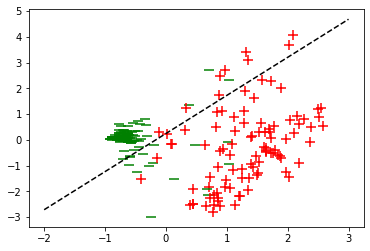

In [18]:
counter = 0
for i, j, k in dpsdata_test:
    if(dpsclass_test[counter] == 1):
        plt.scatter(i, j, s=120, marker='+', linewidths=2, color='red')
    else:
        plt.scatter(i, j, s=120, marker='_', linewidths=2, color='green')
    counter += 1
    
a = -weights[0] / weights[1]
xx = np.linspace(-2,3)
yy = a * xx - (weights[2] / weights[1])
plt.plot(xx, yy, 'k--')
plt.show()